Problem Statement:
Using features like number of rooms, crime rates; we'll implement a regression model to
accurately predict Boston house prices

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
df= pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [50]:
print(df.isnull().sum())
print(df.describe())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
             CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  486.000000  486.000000  486.000000  ...  506.000000  486.000000  506.000000
mean     3.611874   11.211934   11.083992  ...  356.674032   12.715432   22.532806
std      8.720192   23.388876    6.835896  ...   91.294864    7.155871    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.081900    0.000000    5.190000  ...  375.377500    7.125000   17.025000
50%      0.253715    0.000000    9.690000  ...  391.440000   11.430000   21.200000
75%      3.560263   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]


In [51]:
# Dropping rows with missing values
df = df.dropna()

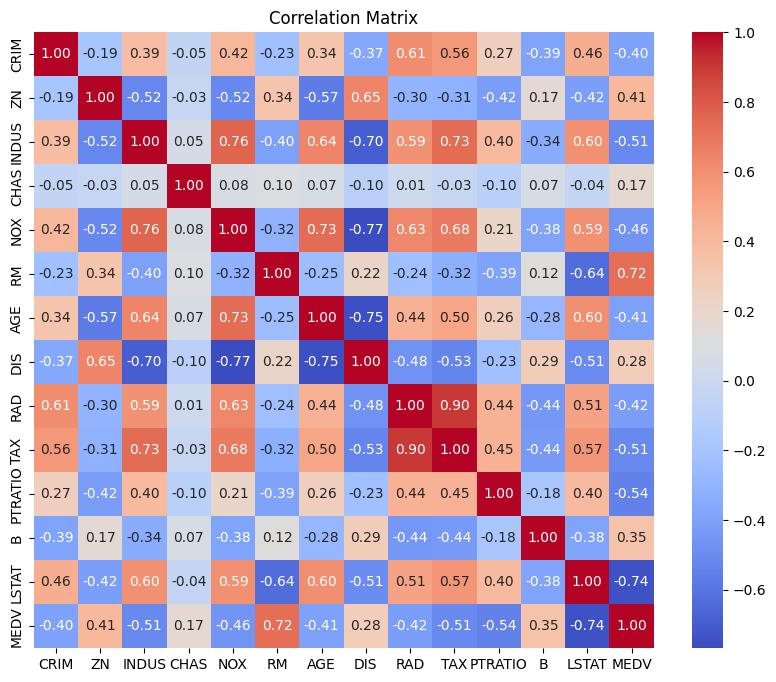

In [52]:
#correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Feature Scaling and Splitting

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df.drop('MEDV',axis=1)
y=df['MEDV']

#Scaling our feateres
scaler = StandardScaler()
x_scaled=scaler.fit_transform(X)

x_train, x_test, y_train, y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
model=LinearRegression()
model.fit(x_train,y_train)

#making predictions
y_pred=model.predict(x_test)

#Evaluation metrics
accuracy = model.score(x_test, y_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

# Displaying the results
print("Accuracy:", accuracy)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Accuracy: 0.6270849941673202
Mean Squared Error: 31.454047664950775
R-squared: 0.6270849941673202


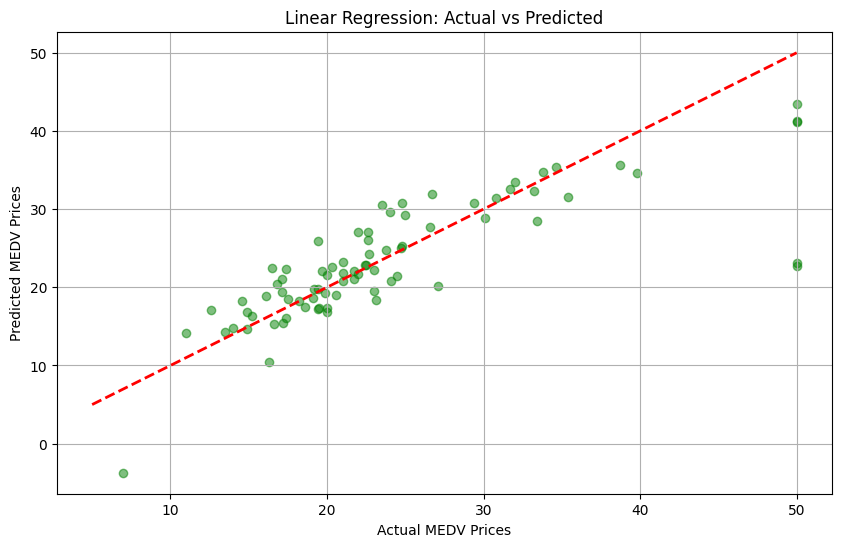

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)

plt.xlabel('Actual MEDV Prices')
plt.ylabel('Predicted MEDV Prices')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()


Trying to get better Accuracy using Decision tree.

In [56]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor(random_state=42)

#Training the model
dt_model.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [57]:
#Predictions
y_pred_dt=dt_model.predict(x_test)

#Evaluation
accuracy_dt = dt_model.score(x_test, y_test)
mse_dt=mean_squared_error(y_test,y_pred_dt)
r2_dt=r2_score(y_test,y_pred_dt)

print("DecisionTreeRegressor Accuracy:", accuracy_dt)
print("DecisionTreeRegressor Mean Squared Error:", mse_dt)
print("DecisionTreeRegressor R-squared:", r2_dt)


DecisionTreeRegressor Accuracy: 0.6780156625862424
DecisionTreeRegressor Mean Squared Error: 27.158227848101266
DecisionTreeRegressor R-squared: 0.6780156625862424


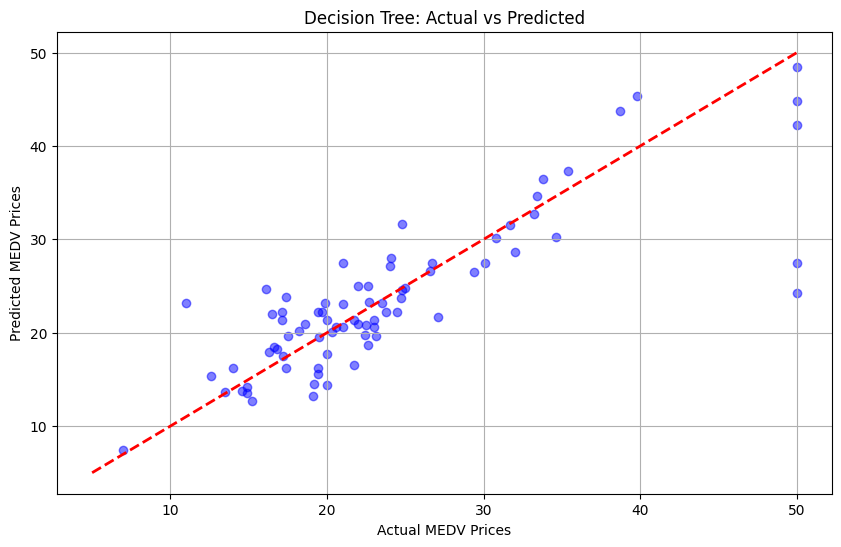

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_dt, alpha=0.5, color='blue')

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)

plt.xlabel('Actual MEDV Prices')
plt.ylabel('Predicted MEDV Prices')
plt.title('Decision Tree: Actual vs Predicted')
plt.grid(True)
plt.show()

Trying to get better Accuracy using Random Forest.

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(random_state=42)

#Training the model
rf_model.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
y_pred_rf=rf_model.predict(x_test)

#Evaluation
accuracy_rf = rf_model.score(x_test, y_test)
mse_rf=mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)

print("RandomForestRegressor Accuracy:", accuracy_rf)
print("RandomForestRegressor Mean Squared Error:", mse_rf)
print("RandomForestRegressor R-squared:", r2_rf)

RandomForestRegressor Accuracy: 0.6604571373611139
RandomForestRegressor Mean Squared Error: 28.639226683544297
RandomForestRegressor R-squared: 0.6604571373611139


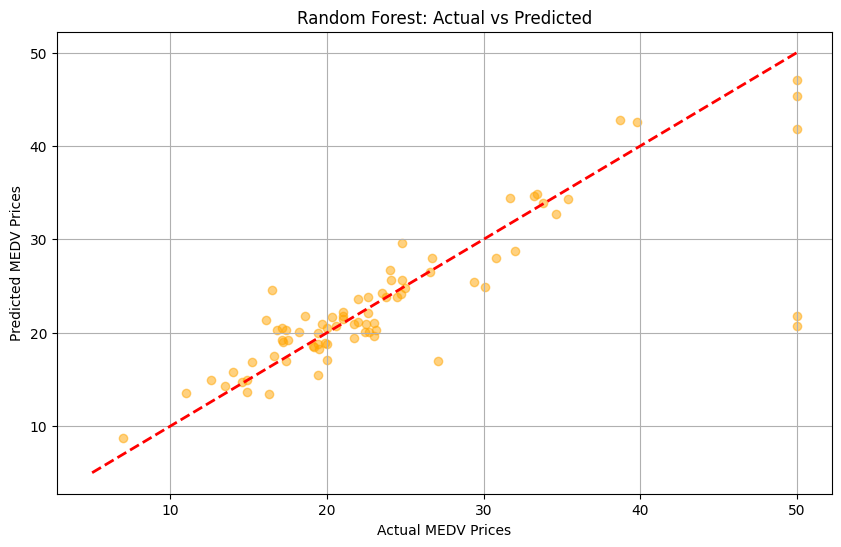

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='orange')

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)

plt.xlabel('Actual MEDV Prices')
plt.ylabel('Predicted MEDV Prices')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.show()